**Introduction**

**Mental Health Significance** 

Mental health is one of the key components toward overall well-being, as it influences an individual's quality of life. Despite its significance, mental health disorders are a global challenge that are seemingly worsening throughout the years. A CNN/Kaiser Family Foundation poll recently reported that "90% of Americans feel that we are in a mental health crisis" (**citation**). There are a variety of factors contributign to mental health disorders, and vary from individual to individual. However, trends exist on a country level such as econimic indicators, demographics, etc, that make individuals more susceptible to mental health disorders. Gaining an understanding of these factors that influence mental health and developing effective preventive strategies are highly valued for worldwide health initiatives. 

More information regarding mental health can be found at the World Health Organization (WHO) website: https://www.who.int/news-room/fact-sheets/detail/mental-health-strengthening-our-response 

**Purpose**

The purpose of this study is to analyze mental health disorders around the world and contribute toward developing predictive models for mental health on a global scale. Various factors that potentially influence mental health disorders around the world will be analyzed, such as demographics, economic indicators, and more. This study will use statistical analysis and machine learning techniques in order to gain insight toward the patterns of mental health disorders, and attempt to predict countries' susceptibilities to mental health disorders. 

This study is especially applicable to data science because it aims to address the very complex nature of mental health disorders around the world through using statistical analysis and machine learning techniques. By understanding the factors that contribute toward mental health disorders, people such as healthcare professionals and policymakers can design preventive strategies for specific populations that are susceptible to mental health disorders. From this, the burden of mental health disorders may be mitigated and overall improve the well-being of individuals around the world. 

**Part 1: Data Collection**

This section includes the functionality for collecting all relevant data for this study. First, all Python libraries are imported here for the study. 

In [23]:
import pandas as pd 
from functools import reduce
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

Factors that could potentially influence mental health throughout the world include: 
- Population density 
- GDP per capita 
- Unemployment percentage
- Life expectancy 
- Healthcare expenditure 

Data sources:

- Mental health dataset by country: https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder
- Population dataset by country: https://www.kaggle.com/datasets/chandanchoudhury/world-population-dataset?select=world_population_by_year_1950_2023.csv 
- GDP dataset by country: https://www.kaggle.com/datasets/tmishinev/world-country-gdp-19602021 
- Unemployment dataset by country: https://www.kaggle.com/datasets/pantanjali/unemployment-dataset 
- Healthcare expenditure and life exepctancy by country: https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank 

**Gathering Data**

The factors (independent variables) analyzed in this study are population density, GDP per capita, unemployment percentage, healthcare expenditure, **demographics. The following demonstrates how the data is gathered, which will be reading from a csv file of each dataset listed above and storing the result in a DataFrame. 

Mental health data

This DataFrame will include mental health information (schizophrenia %, bipolar disorder %, eating disorders %, anxiety disorders %, drug use disorders %, depression %, and alcohol use disorders %) for each country for the years of 1990 through 2017. 

In [24]:
mental_health_data = pd.read_csv("Datasets/Mental health Depression disorder Data.csv", low_memory=False)
mental_health_data.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


Population data 

Two DataFrames are created here, one for global country statistics, and the other for population of each country from the years 1950 through 2023. These datasets will be used in conjunction in order to determine the population density for each country in this range of years. 

In [25]:
country_data = pd.read_csv("Datasets/world_country_stats.csv")
country_data.head()

,country,region,land_area,fertility_rate,median_age
0,Afghanistan,Asia,652860,4.4,17.0
1,Albania,Europe,27400,1.4,38.0
2,Algeria,Africa,2381740,2.8,28.0
3,American Samoa,Oceania,200,2.2,29.0
4,Andorra,Europe,470,1.1,43.0


In [26]:
population_data = pd.read_csv("Datasets/world_population_by_year_1950_2023.csv")
population_data.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,7480461,7571537,7667533,7764546,7864285,7971931,8087727,8210201,8333826,...,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,42239854
1,Albania,1252582,1289168,1326948,1366744,1409005,1453730,1500624,1549571,1600983,...,2884102,2882481,2881063,2879355,2877013,2873883,2866849,2854710,2842321,2832439
2,Algeria,9019866,9271734,9521702,9771686,10011541,10242288,10473168,10703251,10933784,...,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969,44903225,45606480
3,American Samoa,19032,19425,19561,19670,19758,19826,19902,19937,19918,...,52217,51368,50448,49463,48424,47321,46189,45035,44273,43914
4,Andorra,6005,5827,5454,5308,5566,6116,6705,7330,7994,...,71621,71746,72540,73837,75013,76343,77700,79034,79824,80088


GDP per capita data

This DataFrame will contain the GDP per capita in USD for each country between the years 1960 and 2021. 

In [27]:
gdp_data = pd.read_csv("Datasets/world_country_gdp_usd.csv")
gdp_data.head()

,Country Name,Country Code,year,GDP_USD,GDP_per_capita_USD
0,Aruba,ABW,1960,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,2.129059e+10,162.726326
2,Afghanistan,AFG,1960,5.377778e+08,59.773234
3,Africa Western and Central,AFW,1960,1.040414e+10,107.930722
4,Angola,AGO,1960,NaN,NaN


Unemployment data

This DataFrame includes the percentage of individuals in each country that were unemployed in each year from 1991 through 2021.

In [28]:
unemployment_data = pd.read_csv("Datasets/unemployment analysis.csv")
unemployment_data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


Healthcare expenditure and life expectancy data

The following dataframe will contain information regarding each country's healthcare expenditure expressed as a percentage of their GDP, unemployment %, etc, from 2001 through 2019. 

In [29]:
# healthcare expenditure dataset (has healthcare expenditure %, education expenditure %, unemployment %, country's income group, etc)
expenditure_data = pd.read_csv("Datasets/life expectancy.csv")
expenditure_data.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


**Part 2: Data Processing/Cleaning**

After the data has been collected, it must be properly formatted and cleaned in order to be merged for later processing. 

Mental health data



The mental health dataset will need to be cleaned as to drop all irrelevant rows and columns from the table, as well as typecasting the columns to their proper types. The 'Entity' column will be renamed to "Country Name" to remain consistent along all dataframes for later merging. Furthermore, the rows will need to be reduced so that only years from 2001-2017 are in the table. 

In [30]:
# dropping useless info from table 
mental_health_data = mental_health_data.drop(index=mental_health_data.index[6468:])

# typecasting columns to correct types 
mental_health_data['Year'] = mental_health_data['Year'].astype(int)
mental_health_data['Schizophrenia (%)'] = mental_health_data['Schizophrenia (%)'].astype(float)
mental_health_data['Bipolar disorder (%)'] = mental_health_data['Bipolar disorder (%)'].astype(float)
mental_health_data['Eating disorders (%)'] = mental_health_data['Eating disorders (%)'].astype(float)

# dropping rows with years not used in the study (only 2001-2017)
mental_health_data = mental_health_data[(mental_health_data['Year'] >= 2001) & (mental_health_data['Year'] <= 2017)]

# dropping columns irrelevant to study 
mental_health_data = mental_health_data.drop(columns=['index', 'Code'])

# renaming 'Entity' column to 'Country Name'
mental_health_data = mental_health_data.rename(columns={'Entity': 'Country Name'})

In [31]:
mental_health_data.head()

,Country Name,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
11,Afghanistan,2001,0.161957,0.700499,0.086517,4.831409,1.839123,4.121381,0.661158
12,Afghanistan,2002,0.162414,0.701141,0.087023,4.838318,1.934326,4.124928,0.659213
13,Afghanistan,2003,0.162916,0.701860,0.087189,4.845538,2.051106,4.125230,0.657354
14,Afghanistan,2004,0.163377,0.702556,0.088158,4.851512,2.163044,4.126384,0.656132
15,Afghanistan,2005,0.163706,0.703078,0.088933,4.854684,2.247443,4.126908,0.655686


Population data 

The population data currently is in a format such that there is a column for the country name, as well as columns for each year in the table (1950-2023) with its values being the population. In order for this table to be in a tidy format, the data should be reshaped using melting so that the columns are country, year, and population. 

In [32]:
# melting the population data to reshape it 
global_population_data = population_data.melt(id_vars=['country'], var_name='year', value_name='population')

From here, we will need to calculate the population density for each country during this time frame. The 'country_data' dataframe will be used in conjunction with this 'global_population_data' dataframe, as it contains relevant information such as the land area (in km^2) for each country. The two dataframes will first be merged on the country name and then a new column will be created which calculates the population / land area for each country. 

In [33]:
# merge both dataframes on the 'country' column
density_data = pd.merge(global_population_data, country_data, on='country')

# creating 'population_density' column
density_data['population_density'] = density_data['population'] / density_data['land_area']
density_data.head()

,country,year,population,region,land_area,fertility_rate,median_age,population_density
0,Afghanistan,1950,7480461,Asia,652860,4.4,17.0,11.457986
1,Albania,1950,1252582,Europe,27400,1.4,38.0,45.714672
2,Algeria,1950,9019866,Africa,2381740,2.8,28.0,3.787091
3,American Samoa,1950,19032,Oceania,200,2.2,29.0,95.160000
4,Andorra,1950,6005,Europe,470,1.1,43.0,12.776596


Finally, the year column is typecasted to an int, and all years not within the range of 2001-2017 are dropped. Furthermore, irrelevant columns in the table are dropped for this study. The 'country' and 'year' columns will also be renamed to remain consistent with the above.  

In [34]:
# typecasting year to correct int
density_data['year'] = density_data['year'].astype(int)

# dropping rows with years not used in the study (only 2001-2017)
density_data[(density_data['year'] >= 2001) & (density_data['year'] <= 2017)]

# dropping irrelevant columns for study 
density_data = density_data.drop(columns=['population', 'land_area', 'fertility_rate', 'median_age', 'region'])

# renaming 'country' to 'Country Name' and 'year' to 'Year'
density_data = density_data.rename(columns={'country': 'Country Name', 'year': 'Year'})

In [35]:
density_data.head()

,Country Name,Year,population_density
0,Afghanistan,1950,11.457986
1,Albania,1950,45.714672
2,Algeria,1950,3.787091
3,American Samoa,1950,95.160000
4,Andorra,1950,12.776596


GDP per capita data 

The GDP per capita data is already in a proper format for merging the tables, so all that needs to be done is filtering the table to only have rows from the years 2001-2017, dropping any unnecessary columns, and renaming the 'year' column. 

In [36]:
# dropping rows with years not used in the study (only 2001-2017)
gdp_data = gdp_data[(gdp_data['year'] >= 2001) & (gdp_data['year'] <= 2017)]

# dropping irrelevant columns for study
gdp_data = gdp_data.drop(columns=['Country Code', 'GDP_USD'])

# renaming 'year to 'Year'
gdp_data = gdp_data.rename(columns={'year': 'Year'})

In [37]:
gdp_data.head()

,Country Name,Year,GDP_per_capita_USD
10906,Aruba,2001,20417.775960
10907,Africa Eastern and Southern,2001,633.548479
10908,Afghanistan,2001,NaN
10909,Africa Western and Central,2001,539.338735
10910,Angola,2001,527.333529


Unemployment data

Similar to the population data, the unemployment data is formatted with columns for country name, country code, and a column for each year in the table (1991-2021) with values for the percentage of the population in that country that was unemployed. This dataframe will be melted as well, so that the resulting columns in the dataframe are country name, country code, year, and unemployment %. 

In [38]:
# melting the unemployment data to reshape it 
unemployment_data = unemployment_data.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Unemployment (%)')

Next, the 'year' column will need to be typecasted as an int, and the rows will be filtered so that only years from 2001-2017 are in the table. Furthermore, irrelevant columns from the table are dropped. 

In [39]:
# typecasting year to int 
unemployment_data['Year'] = unemployment_data['Year'].astype(int)

# dropping rows with years not used in the study (only 2001-2017)
unemployment_data = unemployment_data[(unemployment_data['Year'] >= 2001) & (unemployment_data['Year'] <= 2017)]

# dropping irrelevant columns for study
unemployment_data = unemployment_data.drop(columns=['Country Code'])

In [40]:
unemployment_data.head()

,Country Name,Year,Unemployment (%)
2350,Africa Eastern and Southern,2001,7.73
2351,Afghanistan,2001,10.81
2352,Africa Western and Central,2001,4.87
2353,Angola,2001,4.00
2354,Albania,2001,18.58


Healthcare expenditure and life expectancy data

The healthcare expenditure data is properly formatted, but needs to be filtered to contain years from 2001-2017 and unecessary columns from the table are dropped. 

In [41]:
# dropping rows with years not used in the study (only 2001-2017)
expenditure_data = expenditure_data[(expenditure_data['Year'] >= 2001) & (expenditure_data['Year'] <= 2017)]

# dropping irrelevant columns for study 
expenditure_data = expenditure_data.drop(columns=['Country Code', 'Prevelance of Undernourishment', 'CO2', 'Education Expenditure %', 'Corruption', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable', 'Unemployment'])

In [42]:
expenditure_data.head()

,Country Name,Region,IncomeGroup,Year,Life Expectancy World Bank,Health Expenditure %
0,Afghanistan,South Asia,Low income,2001,56.308,NaN
1,Angola,Sub-Saharan Africa,Lower middle income,2001,47.059,4.483516
2,Albania,Europe & Central Asia,Upper middle income,2001,74.288,7.139524
3,Andorra,Europe & Central Asia,High income,2001,NaN,5.865939
4,United Arab Emirates,Middle East & North Africa,High income,2001,74.544,2.484370


**Merging the Data**

Now that the data has all been properly formatted, these datasets will be merged together. There are 5 dataframes that will be merged, and each contain the following data from each year during the 2001-2017 time period:

- **mental_health_data**: contains all mental health disorder data for each country
- **density_data**: contains the population density for each country 
- **gdp_data**: contains the GDP per capita in USD for each country 
- **unemployment_data**: contains the percentage of the population in each country that was unemployed
- **expenditure_data**: contains data on the life expectancy and health expenditure % for each country

These dataframes will be merged using the reduce function in Python along with the Panda's merge function, which continuously merges each dataframe on a left merge, starting with the main dataframe, the mental health data. 

In [43]:
# list of all dataframes used for merging 
frames = [mental_health_data, density_data, gdp_data, unemployment_data, expenditure_data]

# using reduce function to merge the dataframes 
df = reduce(lambda left_df, right_df: pd.merge(left_df, right_df, on=['Country Name', 'Year'], how='left'), frames)

df = df.rename(columns={'Country Name': 'country_name', 'Year': 'year', 'Schizophrenia (%)': 'schizophrenia', 'Bipolar disorder (%)': 'bipolar_disorder', 'Eating disorders (%)': 'eating_disorders', 'Anxiety disorders (%)': 'anxiety_disorders', 'Drug use disorders (%)': 'drug_use_disorders', 'Depression (%)': 'depression', 'Alcohol use disorders (%)': 'alcohol_use_disorders', 'Unemployment (%)': 'unemployment_%', 'Region': 'region', 'IncomeGroup': 'income_group', 'Life Expectancy World Bank': 'life_expectancy', 'Health Expenditure %': 'health_expenditure_%'})

df.head()

,country_name,year,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders,population_density,GDP_per_capita_USD,unemployment_%,region,income_group,life_expectancy,health_expenditure_%
0,Afghanistan,2001,0.161957,0.700499,0.086517,4.831409,1.839123,4.121381,0.661158,30.157510,NaN,10.81,South Asia,Low income,56.308,NaN
1,Afghanistan,2002,0.162414,0.701141,0.087023,4.838318,1.934326,4.124928,0.659213,32.166553,179.426579,11.26,South Asia,Low income,56.784,9.443390
2,Afghanistan,2003,0.162916,0.701860,0.087189,4.845538,2.051106,4.125230,0.657354,34.686043,190.683814,11.14,South Asia,Low income,57.271,8.941258
3,Afghanistan,2004,0.163377,0.702556,0.088158,4.851512,2.163044,4.126384,0.656132,36.077491,211.382074,10.99,South Asia,Low income,57.772,9.808474
4,Afghanistan,2005,0.163706,0.703078,0.088933,4.854684,2.247443,4.126908,0.655686,37.391157,242.031313,11.22,South Asia,Low income,58.290,9.948290


**Cleaning the Merged Data**

From some analysis (not shown here) showing all the unique country names present in the dataframe, there seems to have been many entries from the mental health data where country names were broad regions throughout the world, such as 'Central Asia', 'North America', etc. Since this study is on the country level, and not region level, all rows with country names similar to these will be dropped from the table. 

In [44]:
names_drop = ['Australasia', 'Central Asia', 'Central Europe', 'Central Europe, Eastern Europe, and Central Asia', 
              'Central Latin America', 'Central Sub-Saharan Africa', 'Eastern Europe', 'East Asia', 
              'Eastern Sub-Saharan Africa', 'High SDI', 'High-income', 'High-income Asia Pacific', 
              'High-middle SDI', 'Latin America and Caribbean', 'Low SDI', 'Low-middle SDI', 'Middle SDI', 
              'Micronesia (country)', 'North Africa and Middle East', 'North America', 'Oceania', 
              'Southeast Asia', 'Southeast Asia, East Asia, and Oceania', 'Southern Latin America', 
              'Southern Sub-Saharan Africa', 'South Asia', 'Sub-Saharan Africa', 'Tropical Latin America',
              'United States Virgin Islands', 'Western Europe', 'Western Sub-Saharan Africa', 'World']

df = df[~df['country_name'].isin(names_drop)]

Furthermore, we also want to make sure we remove any countries from the DataFrame that did not have corresponding data from the other tables during the merge. There were 7 new columns that were merged onto the mental health data (population density, GDP per capita in USD, unemployment %, region, income group, life expectancy, and healthcare expenditure %). For this study, we will assume that if there are at least 2 of these columns that contain all NaN values for each country (during every year from 2001-2017), there is not sufficient data for the particular country and the country should be excluded from the study. The following gets the countries and how many years in the study these countries are missing at least 2 columns of data. Most countries part of this filtering had 17 years of missing data, which is the entire study period.  

In [45]:
# showing the countries and how many rows for the country did not meet the data criteria 
filtered = df[df.isna().sum(axis=1) >= 2]
counts = filtered.groupby('country_name').size()

These countries will be dropped from the DataFrame as there is not sufficient data to include them for the analysis. 

In [46]:
# getting the names of these countries to drop
names_drop = counts[counts >= 16].index.tolist()

# dropping all countries from the table where at least two columns are NaN for at least 16 years of the study 
df_cleaned = df[~df['country_name'].isin(names_drop)]

df = df_cleaned

**Fixing Missing Data**

Now that any insufficient countries for the analysis have been removed from the DataFrame, we will see how much more missing data remains in the table. The following shows the proportion of rows in the table that contain at least one NaN value. 

In [47]:
print("Number of rows containing an NaN value: ", len(df[df.isna().any(axis=1)]))
print("Proportion of NaN rows in the entire DataFrame: ", len(df[df.isna().any(axis=1)]) / len(df))

Number of rows containing an NaN value:  204
Proportion of NaN rows in the entire DataFrame:  0.075


Although this proportion is very small, there should be no missing values present in the table during further analysis. Below shows the proportion of missing values in the table for each column, as some columns may have more missing data than others. This will allow us to determine how to proceed with filling in missing data values. 

In [48]:
nans = df.isna().mean() 
nans

country_name             0.000000
year                     0.000000
schizophrenia            0.000000
bipolar_disorder         0.000000
eating_disorders         0.000000
anxiety_disorders        0.000000
drug_use_disorders       0.000000
depression               0.000000
alcohol_use_disorders    0.000000
population_density       0.012500
GDP_per_capita_USD       0.010662
unemployment_%           0.025000
region                   0.000000
income_group             0.000000
life_expectancy          0.000000
health_expenditure_%     0.034926
dtype: float64

The original dataframe before filling in the missing values through imputation will be saved as a separate dataframe. This is so that potential bias introduced during imputation can be analyzed after all missing data is filled in.  

In [49]:
original_df = df

Population density missing data

Below shows that the two countries without population density data for the study period are Cote d'Ivoire and Sao Tome and Principe. Neither of these countries have population desnity data for the entire study period (2001-2017).

In [50]:
pop = df['population_density'].isna()
countries = df[pop]
countries['country_name'].unique()

array(["Cote d'Ivoire", 'Sao Tome and Principe'], dtype=object)

Upon further investigation, the original dataset had the necessary data to calculate the population density for these two countries, but their spellings in this dataset were slightly different than the spellings of the countries in other datasets, which is why they are missing the data from this. The land area in the original dataset for Cote d'Ivoire (318,000 km^2) and Sao Tome and Principe (960 km^2). To fix the missing values, the original yearly population data will used to calculate the population density for these two countries, and then used to fill in the missing values in the current dataframe. 

In [52]:
# getting Cote d'Ivoire and Sao Tome and Principe's population density data
countries = ['Côte d\'Ivoire', 'Sao Tome & Principe']
filtered_countries = density_data[density_data['Country Name'].isin(countries) & density_data['Year'].between(2001,2017)]

In [55]:
# filling in missing population_density values in df for Côte d'Ivoire and Sao Tome & Principe
for i, r in filtered_countries.iterrows():
    # country is Côte d'Ivoire, update its corresponding row in dataframe 
    if r['Country Name'] == 'Côte d\'Ivoire':
        cond = (df['country_name'] == 'Cote d\'Ivoire') & (df['year'] == r['Year'])
        df.loc[cond, 'population_density'] = r['population_density']
    # country is Sao Tome & Principe, update its corresponding row in dataframe 
    else:
        cond = (df['country_name'] == 'Sao Tome and Principe') & (df['year'] == r['Year'])
        df.loc[cond, 'population_density'] = r['population_density']

Healthcare expenditure % missing data

Since there is not much missing data for healthcare expenditure % and most of the other missing data in the table has been filled in, linear regression will be used to fill in the data for the missing years. 

In [56]:
# performing linear regression to fill in the missing values under healthcare expenditure % based 
# on year, population density, and life expectancy. 

# getting the training data 
training_data = df.dropna(subset=['health_expenditure_%'])
X_training = training_data[['year', 'population_density', 'life_expectancy']]
y_training = training_data['health_expenditure_%']

# getting the linear regression model for predicting healthcare expenditure %
model = LinearRegression()
model.fit(X_training, y_training)

# getting indices in the dataframe where healthcare expenditure % is NaN 
missing_indices = df[df['health_expenditure_%'].isna()].index

# predicting value for NaN rows 
missing_row = df.loc[missing_indices, ['year', 'population_density', 'life_expectancy']]
predictions = model.predict(missing_row)

# filling in NaN values with predictions 
df.loc[missing_indices, 'health_expenditure_%'] = predictions

GDP per capita missing data 

The rows in the table with missing values in the GDP per capita column are more scattered, as there are not any countries in the table with missing GDP values throughout the whole study period. Here, we can use a linear regression model to predict the GDP per capita in USD for these rows with missing data.

In [57]:
# performing linear regression to fill in the missing values under unemployment % based 
# on year, population density, and healthcare expenditure %

# getting the training data 
training_data = df.dropna(subset=['GDP_per_capita_USD'])
X_training = training_data[['year', 'population_density', 'health_expenditure_%']]
y_training = training_data['GDP_per_capita_USD']

# getting the linear regression model for predicting healthcare expenditure %
model = LinearRegression()
model.fit(X_training, y_training)

# getting indices in the dataframe where healthcare expenditure % is NaN 
missing_indices = df[df['GDP_per_capita_USD'].isna()].index

# predicting value for NaN rows 
missing_row = df.loc[missing_indices, ['year', 'population_density', 'health_expenditure_%']]
predictions = model.predict(missing_row)

# filling in NaN values with predictions 
df.loc[missing_indices, 'GDP_per_capita_USD'] = predictions

Unemployment % missing data 

Countries with missing unemployment % data are also scattered, so these missing years will be filled in using linear regression with the following predictors: year, population density, healthcare expenditure %, GDP per capita. 

In [58]:
# performing linear regression to fill in the missing values under unemployment % based 
# on year, population density, and healthcare expenditure %, and GDP per capita

# getting the training data 
training_data = df.dropna(subset=['unemployment_%'])
X_training = training_data[['year', 'population_density', 'health_expenditure_%', 'GDP_per_capita_USD']]
y_training = training_data['unemployment_%']

# getting the linear regression model for predicting healthcare expenditure %
model = LinearRegression()
model.fit(X_training, y_training)

# getting indices in the dataframe where healthcare expenditure % is NaN 
missing_indices = df[df['unemployment_%'].isna()].index

# predicting value for NaN rows 
missing_row = df.loc[missing_indices, ['year', 'population_density', 'health_expenditure_%', 'GDP_per_capita_USD']]
predictions = model.predict(missing_row)

# filling in NaN values with predictions 
df.loc[missing_indices, 'unemployment_%'] = predictions

Now all of the missing data has been filled! We can verify this with the same code as above, which calculates the proportions of each column that have NaN values present in the table.

In [59]:
nans = df.isna().mean() 
nans

country_name             0.0
year                     0.0
schizophrenia            0.0
bipolar_disorder         0.0
eating_disorders         0.0
anxiety_disorders        0.0
drug_use_disorders       0.0
depression               0.0
alcohol_use_disorders    0.0
population_density       0.0
GDP_per_capita_USD       0.0
unemployment_%           0.0
region                   0.0
income_group             0.0
life_expectancy          0.0
health_expenditure_%     0.0
dtype: float64

**Part 3: Exploratory Data Analysis and Data Visualization**

** add more visualization plots to this 

**Analyzing Pre and Post Imputation**

As a result of imputing some of the missing data, some bias could have been introduced. In order to understand if any bias introduced would have a significant effect on later analysis, the standard deviation and mean for each of the predictor variables that were imputed in the study will be plotted using the following function.

In [60]:
def plot_imputation_effects(feature, feature_name, ylabel):
    # computing the mean and standard deviation for the original dataframe 
    original_means = original_df.groupby('year')[feature].mean()
    original_std = original_df.groupby('year')[feature].std()

    # computing the mean and standard deviation for the post-imputation dataframe 
    post_imp_means = df.groupby('year')[feature].mean()
    post_imp_std = df.groupby('year')[feature].std()

    plt.figure(figsize=(18, 8))

    # plot for standard deviations 
    plt.subplot(1, 2, 1)
    plt.plot(original_std.index, original_std.values, label='Pre-imputation')
    plt.plot(post_imp_std.index, post_imp_std.values, label='Post-imputation')
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(f'Standard deviations of {feature_name} by year')
    plt.grid(True)
    plt.legend()

    # plot for means 
    plt.subplot(1, 2, 2)
    plt.plot(original_means.index, original_means.values, label='Pre-imputation')
    plt.plot(post_imp_means.index, post_imp_means.values, label='Post-imputation')
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(f'Mean {feature_name} by year')
    plt.grid(True)
    plt.legend()
    plt.show()
    

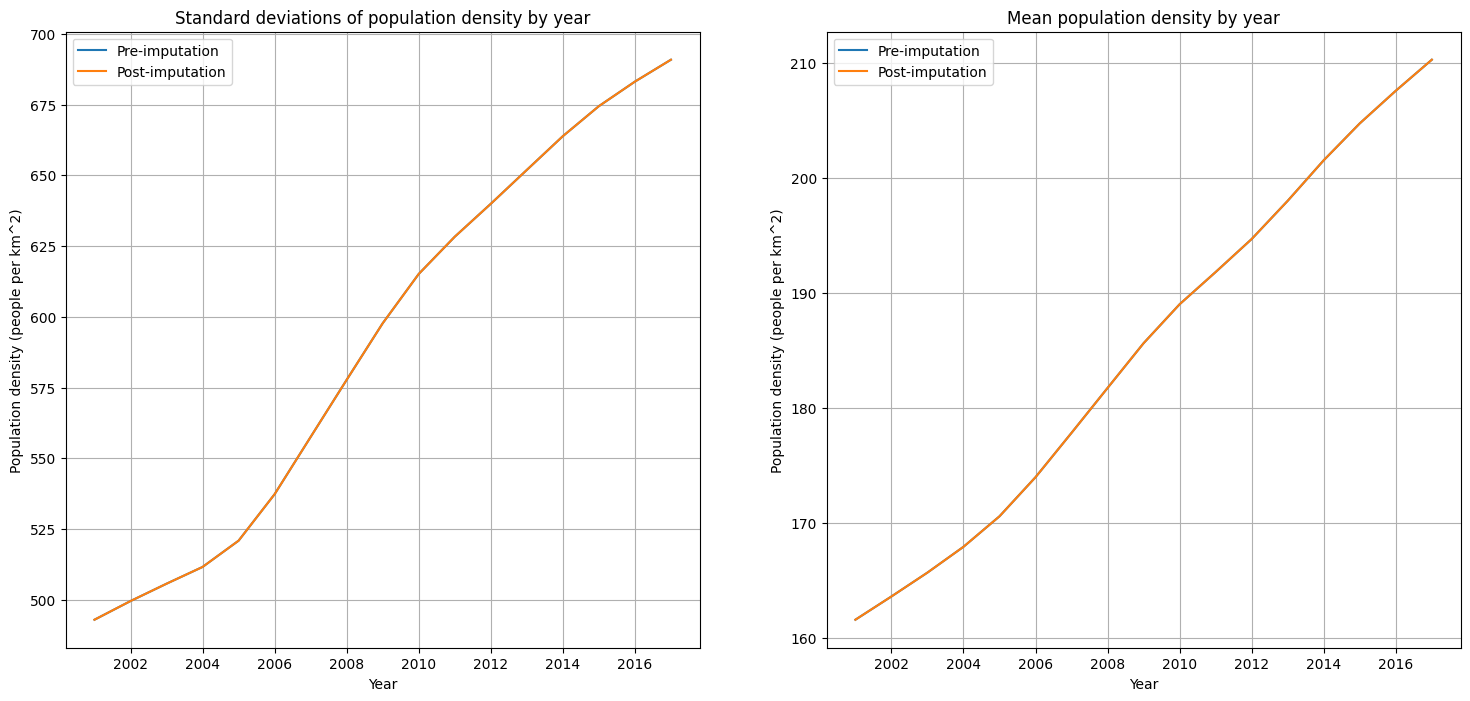

In [61]:
plot_imputation_effects('population_density', 'population density', 'Population density (people per km^2)')

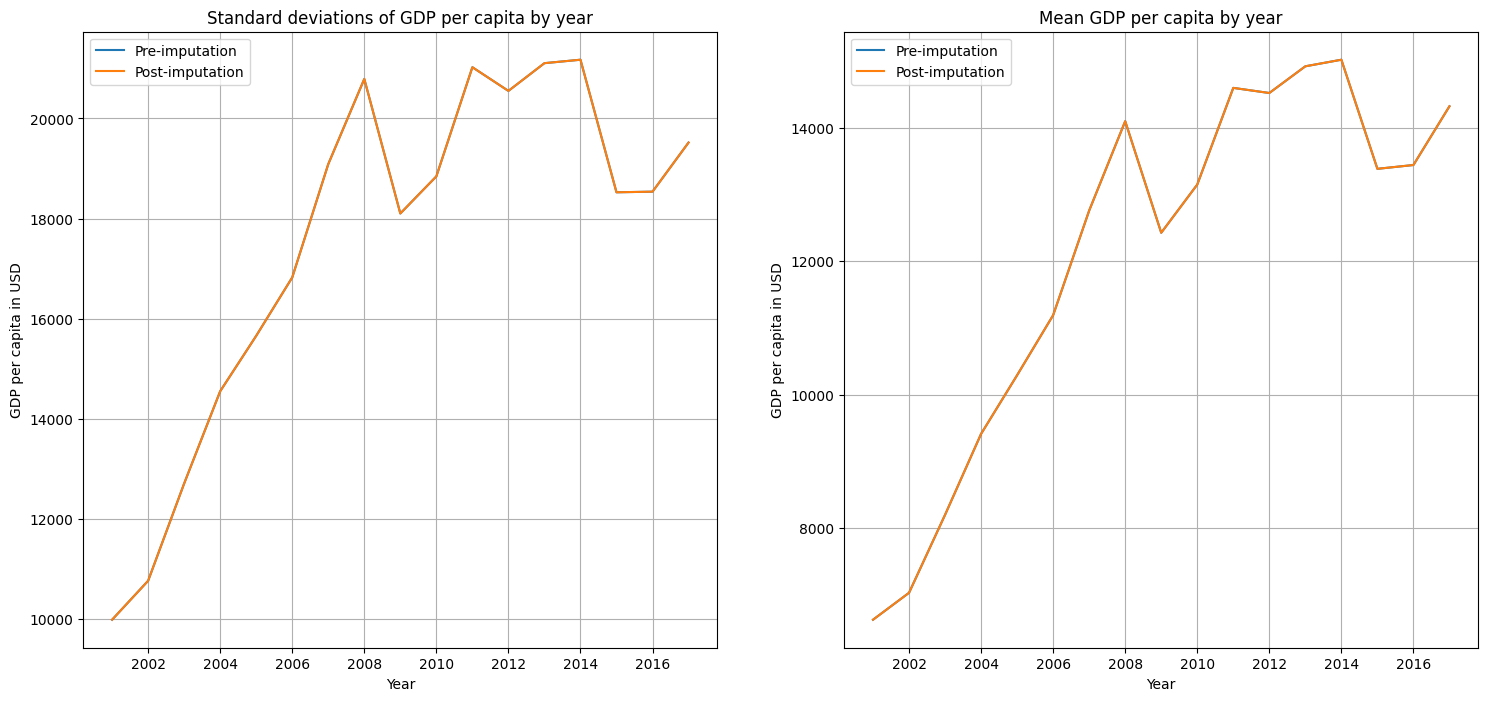

In [62]:
plot_imputation_effects('GDP_per_capita_USD', 'GDP per capita', 'GDP per capita in USD')

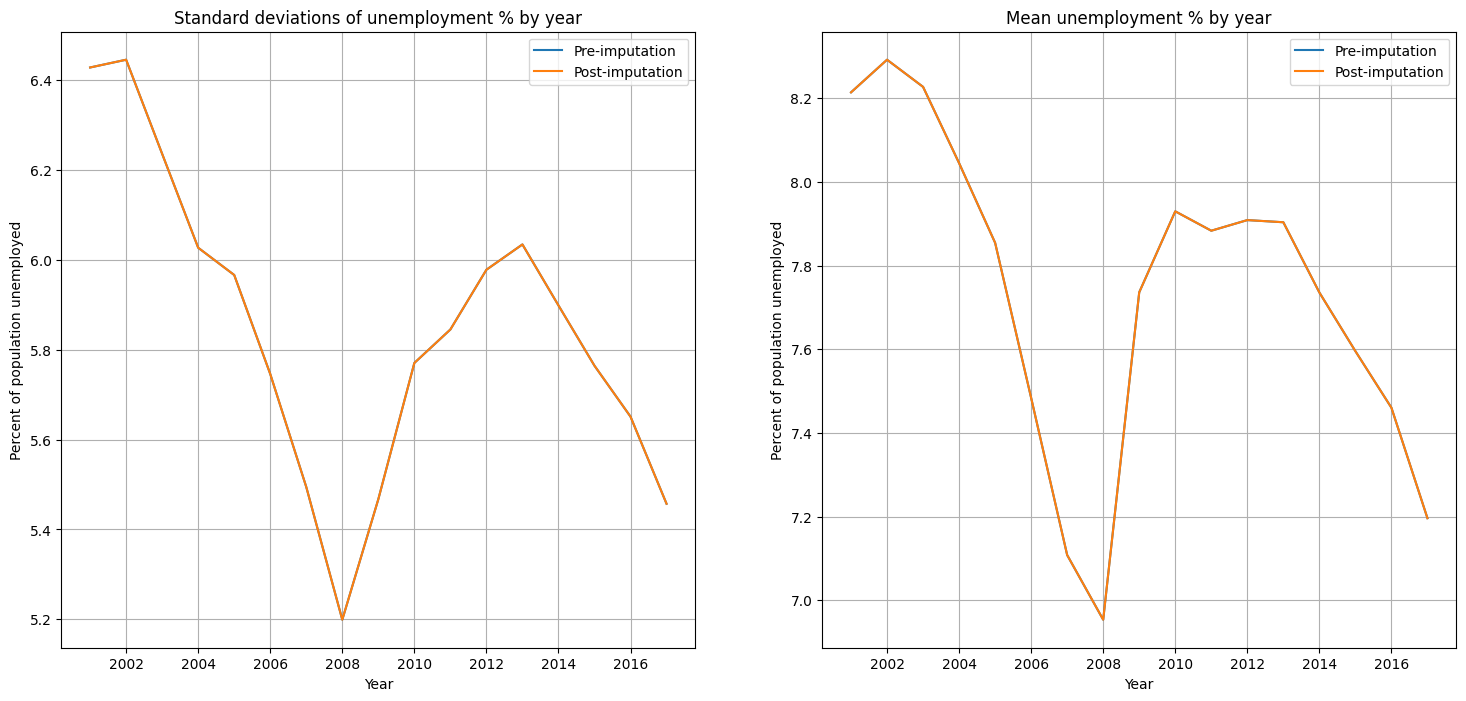

In [63]:
plot_imputation_effects('unemployment_%', 'unemployment %', 'Percent of population unemployed')

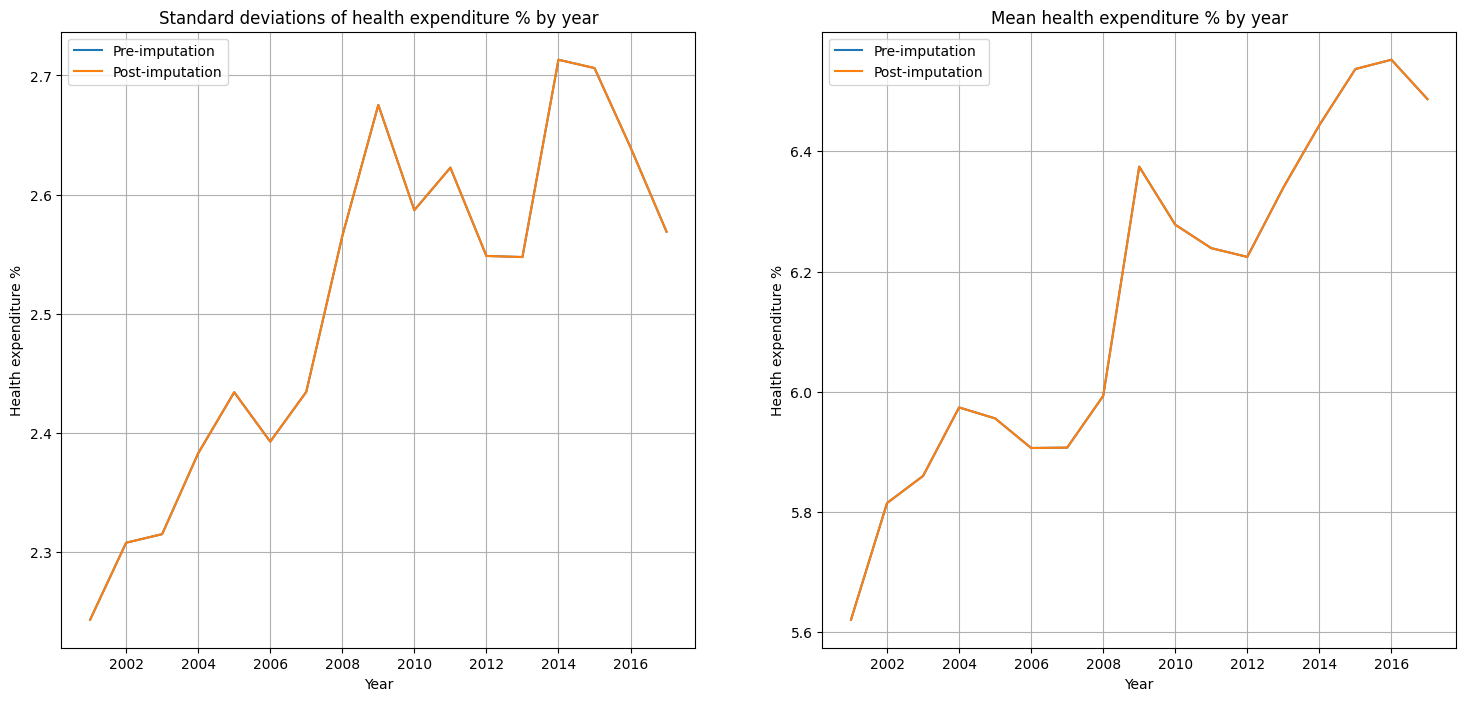

In [64]:
plot_imputation_effects('health_expenditure_%', 'health expenditure %', 'Health expenditure %')

Great! So the filling of missing data (imputation) done in this study did not introduce any bias into the data. 

** graph attributes by region, income group 

**Part 4: Analysis, Hypothesis Testing, & ML**

**Addressing Multicollinearity**

Before creating any linear regression models, the presence of multicollinearity within the independent variables should be checked. Multicollinearity is when at least two independent variables in a study are highly correlated with each other, which can lead to issues when trying to examine the significance of individual variables in the model. 

In order to detect potentially harmful multicollinearity, the Variance Inflation Factor (VIF) will be employed. The VIF measures how significantly the variance of the regression coefficient increases due to multicollinearity. If the VIF is 1, variables are not correlated. If the VIF is between 1 and 5, the variables are moderately correlated, and if the VIF is larger than 5, the variables are highly correlated and one should be removed or alternative approaches for their correlation should be explored. 

More information regarding the VIF can be found here: https://www.investopedia.com/terms/v/variance-inflation-factor.asp 

Before calculating the VIF for the independent variables, we should view the correlation matrix for the independent variables.

In [66]:
# correlation matrix for the independent variables in the study 
df[['population_density', 'GDP_per_capita_USD', 'unemployment_%', 
    'life_expectancy', 'health_expenditure_%']].corr()

,population_density,GDP_per_capita_USD,unemployment_%,life_expectancy,health_expenditure_%
population_density,1.000000,0.159300,-0.089919,0.170302,-0.066740
GDP_per_capita_USD,0.159300,1.000000,-0.103030,0.589776,0.369825
unemployment_%,-0.089919,-0.103030,1.000000,-0.022907,0.191833
life_expectancy,0.170302,0.589776,-0.022907,1.000000,0.343019
health_expenditure_%,-0.066740,0.369825,0.191833,0.343019,1.000000


From this, we can see that life expectancy and GDP per capita are somewhat highly correlated. Let's now analyze the VIF values betweeen the features in the study, and decide if any VIF are strong enough to take further action. 

In [67]:
# calculating the VIF between features in the table 
X = df[['population_density', 'GDP_per_capita_USD', 'unemployment_%', 'life_expectancy', 'health_expenditure_%']]
vif = pd.DataFrame()
vif['Feature'] = X.columns 
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Feature,VIF
0,population_density,1.163772
1,GDP_per_capita_USD,1.827030
2,unemployment_%,2.944398
3,life_expectancy,9.151506
4,health_expenditure_%,8.924534


Life expectancy has a very high VIF value, meaning it is highly correlated with the other features in the model (it is on the cusp of having a severe VIF value of 10). Because of this, the life expectancy feature will be dropped, since it may have distorting effects on the analysis. The VIF between variables will also be recalculated, and hopefully removing life expectancy from the features will reduce the VIFs significantly. 

In [68]:
df = df.drop(columns=['life_expectancy'])

In [69]:
# calculating the VIF between life expectancy and GDP per capita 
X = df[['population_density', 'GDP_per_capita_USD', 'unemployment_%', 'health_expenditure_%']]
vif = pd.DataFrame()
vif['Feature'] = X.columns 
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Feature,VIF
0,population_density,1.102698
1,GDP_per_capita_USD,1.798486
2,unemployment_%,2.691886
3,health_expenditure_%,3.796498


From this, we can see that the VIF values between variables has reduced significantly. We have now adjusted the data by removing high multicollinearity, which should make it more suitable and stable for the study. We can now move into the hypothesis testing phase of the study. 

**Hypothesis Testing**

Let's take another look at the different categories of mental health data we have present in the dataframe. These are: 

- Schizophrenia 
- Bipolar disorder 
- Eating disorders 
- Anxiety disorders 
- Drug use disorders 
- Depression
- Alcohol use disorders 

These are represented in the dataframe as the percentage of the country's population that has the particular mental health disorder. 

We will first start with creating preliminary linear regression models to examine the relationships between the independent variables (population density, GDP per capita, unemployment %, and healthcare expenditure %) on each of the above mental health disorders. This will be done by using the Ordinary Least Squares (OLS) regression for a linear regression model. More about this can be found here: https://www.statsmodels.org/devel/example_formulas.html 

Schizophrenia model

In [72]:
reg_schizophrenia = smf.ols(formula='schizophrenia ~ year + population_density + GDP_per_capita_USD + Q("unemployment_%") + Q("health_expenditure_%")', data=df).fit()
reg_schizophrenia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          schizophrenia   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     388.1
Date:                Wed, 01 May 2024   Prob (F-statistic):          1.25e-314
Time:                        14:23:55   Log-Likelihood:                 5408.2
No. Observations:                2720   AIC:                        -1.080e+04
Df Residuals:                    2714   BIC:                        -1.077e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.2934      0.264      4.906      0.000       0.776       1.810
year                         -0.0006      0.000     -4.215      0.000      -0.001      -0.000
population_density         7.565e-06    1.1e-06      6.895      0.000    5.41e-06    9.72e-06
GDP_per_capita_USD         1.332e-06   3.96e-08     33.646      0.000    1.25e-06    1.41e-06
Q("unemployment_%")          -0.0007      0.000     -6.147      0.000      -0.001      -0.000
Q("health_expenditure_%")     0.0024      0.000      8.438      0.000       0.002       0.003
==============================================================================
Omnibus:                      517.821   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.559
Skew:                           1.028   Prob(JB):                    1.18e-289
Kurtosis:                       5.741   Cond. No.                     9.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Bipolar disorder model

In [74]:
reg_bipolar_disorder = smf.ols(formula='bipolar_disorder ~ year + population_density + GDP_per_capita_USD + Q("unemployment_%") + Q("health_expenditure_%")', data=df).fit()
reg_bipolar_disorder.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       bipolar_disorder   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     265.2
Date:                Wed, 01 May 2024   Prob (F-statistic):          2.50e-231
Time:                        14:24:34   Log-Likelihood:                 1641.7
No. Observations:                2720   AIC:                            -3271.
Df Residuals:                    2714   BIC:                            -3236.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.2324      1.053      4.970      0.000       3.168       7.297
year                         -0.0023      0.001     -4.412      0.000      -0.003      -0.001
population_density        -7.583e-06   4.38e-06     -1.731      0.084   -1.62e-05    1.01e-06
GDP_per_capita_USD          4.34e-06   1.58e-07     27.459      0.000    4.03e-06    4.65e-06
Q("unemployment_%")           0.0026      0.000      5.726      0.000       0.002       0.003
Q("health_expenditure_%")     0.0115      0.001     10.165      0.000       0.009       0.014
==============================================================================
Omnibus:                       41.540   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.703
Skew:                           0.190   Prob(JB):                     4.86e-13
Kurtosis:                       3.597   Cond. No.                     9.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Eating disorders model

In [75]:
reg_eating_disorders = smf.ols(formula='eating_disorders ~ year + population_density + GDP_per_capita_USD + Q("unemployment_%") + Q("health_expenditure_%")', data=df).fit()
reg_eating_disorders.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       eating_disorders   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1309.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        14:24:50   Log-Likelihood:                 2720.2
No. Observations:                2720   AIC:                            -5428.
Df Residuals:                    2714   BIC:                            -5393.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.2339      0.708      5.978      0.000       2.845       5.623
year                         -0.0021      0.000     -5.865      0.000      -0.003      -0.001
population_density         9.889e-06   2.95e-06      3.355      0.001    4.11e-06    1.57e-05
GDP_per_capita_USD         6.947e-06   1.06e-07     65.344      0.000    6.74e-06    7.16e-06
Q("unemployment_%")           0.0012      0.000      3.841      0.000       0.001       0.002
Q("health_expenditure_%")     0.0116      0.001     15.244      0.000       0.010       0.013
==============================================================================
Omnibus:                      624.039   Durbin-Watson:                   0.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2630.003
Skew:                           1.056   Prob(JB):                         0.00
Kurtosis:                       7.330   Cond. No.                     9.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Anxiety disorders model

In [76]:
reg_anxiety_disorders = smf.ols(formula='anxiety_disorders ~ year + population_density + GDP_per_capita_USD + Q("unemployment_%") + Q("health_expenditure_%")', data=df).fit()
reg_anxiety_disorders.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      anxiety_disorders   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     324.9
Date:                Wed, 01 May 2024   Prob (F-statistic):          3.01e-273
Time:                        14:25:14   Log-Likelihood:                -3666.1
No. Observations:                2720   AIC:                             7344.
Df Residuals:                    2714   BIC:                             7380.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    42.9241      7.410      5.792      0.000      28.394      57.454
year                         -0.0199      0.004     -5.396      0.000      -0.027      -0.013
population_density        -9.277e-05   3.08e-05     -3.008      0.003      -0.000   -3.23e-05
GDP_per_capita_USD         3.369e-05   1.11e-06     30.282      0.000    3.15e-05    3.59e-05
Q("unemployment_%")           0.0089      0.003      2.797      0.005       0.003       0.015
Q("health_expenditure_%")     0.0954      0.008     11.989      0.000       0.080       0.111
==============================================================================
Omnibus:                      329.188   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              511.970
Skew:                           0.857   Prob(JB):                    6.72e-112
Kurtosis:                       4.256   Cond. No.                     9.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Drug use disorders model

In [79]:
reg_drug_use_disorders = smf.ols(formula='drug_use_disorders ~ year + population_density + GDP_per_capita_USD + Q("unemployment_%") + Q("health_expenditure_%")', data=df).fit()
reg_drug_use_disorders.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     drug_use_disorders   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     123.5
Date:                Wed, 01 May 2024   Prob (F-statistic):          4.24e-118
Time:                        14:25:56   Log-Likelihood:                -1600.8
No. Observations:                2720   AIC:                             3214.
Df Residuals:                    2714   BIC:                             3249.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     6.5782      3.468      1.897      0.058      -0.222      13.378
year                         -0.0030      0.002     -1.727      0.084      -0.006       0.000
population_density        -2.688e-05   1.44e-05     -1.862      0.063   -5.52e-05    1.42e-06
GDP_per_capita_USD         1.083e-05   5.21e-07     20.805      0.000    9.81e-06    1.19e-05
Q("unemployment_%")           0.0054      0.001      3.642      0.000       0.002       0.008
Q("health_expenditure_%")     0.0138      0.004      3.697      0.000       0.006       0.021
==============================================================================
Omnibus:                     1116.908   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4577.444
Skew:                           2.015   Prob(JB):                         0.00
Kurtosis:                       7.915   Cond. No.                     9.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Depression model

In [80]:
reg_depression = smf.ols(formula='depression ~ year + population_density + GDP_per_capita_USD + Q("unemployment_%") + Q("health_expenditure_%")', data=df).fit()
reg_depression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     35.51
Date:                Wed, 01 May 2024   Prob (F-statistic):           2.64e-35
Time:                        14:26:12   Log-Likelihood:                -2525.3
No. Observations:                2720   AIC:                             5063.
Df Residuals:                    2714   BIC:                             5098.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    21.8708      4.872      4.489      0.000      12.318      31.424
year                         -0.0093      0.002     -3.823      0.000      -0.014      -0.005
population_density        -2.475e-05   2.03e-05     -1.220      0.222   -6.45e-05     1.5e-05
GDP_per_capita_USD         7.027e-06   7.31e-07      9.609      0.000    5.59e-06    8.46e-06
Q("unemployment_%")           0.0031      0.002      1.488      0.137      -0.001       0.007
Q("health_expenditure_%")     0.0222      0.005      4.243      0.000       0.012       0.032
==============================================================================
Omnibus:                      166.278   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.818
Skew:                           0.522   Prob(JB):                     3.09e-53
Kurtosis:                       4.021   Cond. No.                     9.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Alcohol use disorders model

In [81]:
reg_alcohol_use_disorders = smf.ols(formula='alcohol_use_disorders ~ year + population_density + GDP_per_capita_USD + Q("unemployment_%") + Q("health_expenditure_%")', data=df).fit()
reg_alcohol_use_disorders.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     alcohol_use_disorders   R-squared:                       0.054
Model:                               OLS   Adj. R-squared:                  0.052
Method:                    Least Squares   F-statistic:                     30.82
Date:                   Wed, 01 May 2024   Prob (F-statistic):           1.37e-30
Time:                           14:26:28   Log-Likelihood:                -3347.2
No. Observations:                   2720   AIC:                             6706.
Df Residuals:                       2714   BIC:                             6742.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.6683      6.591     -0.405      0.686     -15.591      10.255
year                          0.0020      0.003      0.595      0.552      -0.004       0.008
population_density           -0.0002   2.74e-05     -6.595      0.000      -0.000      -0.000
GDP_per_capita_USD         -3.79e-06   9.89e-07     -3.830      0.000   -5.73e-06   -1.85e-06
Q("unemployment_%")           0.0108      0.003      3.833      0.000       0.005       0.016
Q("health_expenditure_%")     0.0497      0.007      7.027      0.000       0.036       0.064
==============================================================================
Omnibus:                     1186.778   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6014.755
Skew:                           2.061   Prob(JB):                         0.00
Kurtosis:                       9.007   Cond. No.                     9.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above, it seems that the linear regression model using OLS is only plausible for predicting eating disorders. Its R-squared of .707 indicates that approximately 70.7% of the variability for eating disorders can be explained by the independent variables in the model, which is a relatively high value. Furthermore, the probability of the F-statistic (p-value) being 0.00 strongly suggests the model is statistically significant, meaning we can reject the null hypothesis of the predictor variables not having an effect on 'eating_disorders'. 

However, even though the model fitted the eating disorders data well, it is evident that using linear regression for the other mental health disorder variables does not fit the data well. Therefore, we'll need to use another kind of model to fit the data for a more accurate analysis. 

** figure out other type of model to use 

** next step: be able to predict which mental health disorder would be most prevalent in a given country and year 